# PROYECTO FIN DE MÁSTER

## X Máster en Big Data Aplicado & Business Analytics

### Jesús Bruque Guerrero

## _PREDICCIÓN DEL CÁNCER DE MAMA BENIGNO O MALIGNO_

###  1.- Introducción con el objetivo del análisis
   
   El objetivo de este Proyecto Fin de Máster será construir, gracias al dataset "Breast Cancer Wisconsin (Diagnostic)", un modelo de machine learning capaz de preveer, con las variables adecuadas, el diagnóstico de cáncer de mama benigno o maligno. Utilizaremos modelos de algoritmos automáticos tanto no supervisados (k-means) como supervisados (Logistic Regression).

### 2.- Carga de los datos y análisis descriptivo

#### Importamos las librerías


In [253]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import precision_score 
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

#### Carga del dataset 


In [254]:
path = "C:/Users/bruke/breast_cancer.csv"
df = pd.read_csv(path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [255]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [257]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#### Limpieza del dataset


Número de observaciones por clase
0    357
1    212
Name: diagnosis, dtype: int64

Porcentaje de observaciones por clase
0    62.741652
1    37.258348
Name: diagnosis, dtype: float64


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

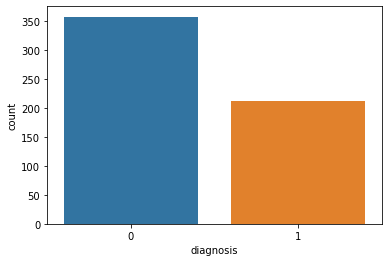

In [258]:
#Eliminamos las 2 columnas que no aportan información a nuestro dataset.

df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)


#Sustituimos la variable 'diagnosis' por 1 y 0 para que sea de tipo int.

categories = {'B':0, 'M':1}
df['diagnosis'].replace(categories, inplace=True)

#Visualizamos cuantas observaciones hay de la variable 'diagnosis'

print("Número de observaciones por clase")
print(df['diagnosis'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * df['diagnosis'].value_counts(normalize=True))

df.head()

sns.countplot(df['diagnosis'],label="Count")

#### Matriz de correlación

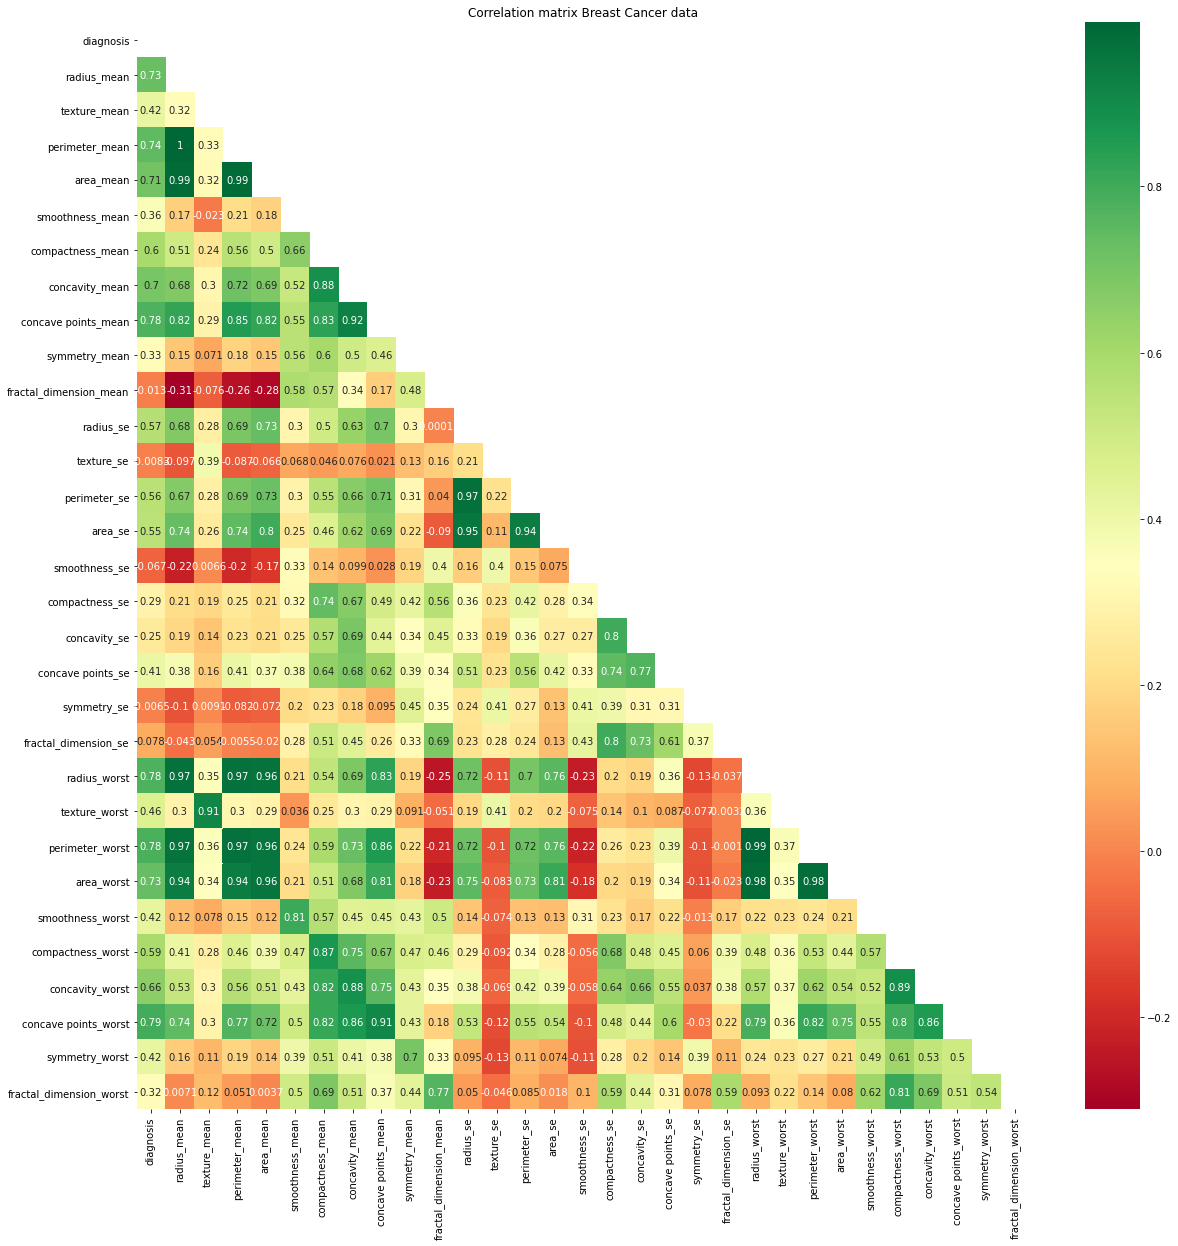

In [259]:
corr = np.triu(df.corr())
plt.figure(figsize=(20,20))
corr = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask=corr, cmap="RdYlGn")
plt.title("Correlation matrix Breast Cancer data")
plt.show()

La variable target será 'diagnosis' y para relacionarla con las demás variables utilizaremos las que han tenido una correlación mayor o igual a 0.7. Un total de 9 variables.

'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst' y 'concave points_worst'


In [260]:
features = df[['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 
               'perimeter_worst', 'area_worst', 'concave points_worst']]

 ### 3.- ALGORITMO DE APRENDIZAJE AUTOMÁTICO NO SUPERVISADO: K-MEANS

Número óptimo de clusters=2


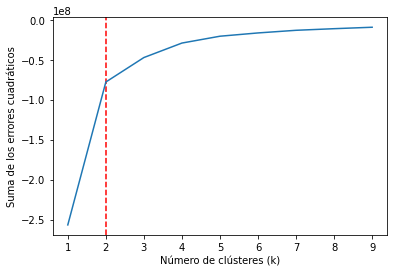

In [261]:
#Curva elbow para determinar valor óptimo de k.

nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score
plt.axvline(2, 0, 1, c='red', ls='--')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

print('Número óptimo de clusters=2')

In [262]:
#Determinamos donde se colocan los centroides

kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.87214612e-01 1.25562991e+01 1.85703653e+01 8.11234703e+01
  4.96061872e+02 9.48844977e-02 9.10998174e-02 6.24377642e-02
  3.34325434e-02 1.78057991e-01 6.34540183e-02 3.04190868e-01
  1.21515320e+00 2.15288059e+00 2.37852922e+01 7.17326256e-03
  2.34746895e-02 2.87455128e-02 1.06363242e-02 2.06135799e-02
  3.74750297e-03 1.40439018e+01 2.47095434e+01 9.19375114e+01
  6.19647945e+02 1.29959110e-01 2.23311758e-01 2.19214947e-01
  9.13298425e-02 2.83553653e-01 8.32819406e-02]
 [9.92366412e-01 1.93799237e+01 2.16945802e+01 1.28231298e+02
  1.18592977e+03 1.01294580e-01 1.48612977e-01 1.76939466e-01
  1.00698779e-01 1.91539695e-01 6.06029008e-02 7.42803817e-01
  1.22253817e+00 5.25058015e+00 9.56781679e+01 6.59868702e-03
  3.21766947e-02 4.24197710e-02 1.56739847e-02 2.03039695e-02
  3.95338931e-03 2.37094656e+01 2.89126718e+01 1.58496183e+02
  1.75302290e+03 1.40424733e-01 3.57757710e-01 4.49306107e-01
  1.92431069e-01 3.11881679e-01 8.61654962e-02]]


In [263]:
#Creamos una nueva columna para determinar a que clúster pertenece cada observación

labels = kmeans.predict(df)
df['label'] = labels

df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


  ### 4.- ALGORITMO DE APRENDIZAJE AUTOMÁTICO SUPERVISADO: LOGISTIC REGRESSION

In [264]:
# División de los datos en train y test

X = features
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 9)
Shape of test set: (114, 9)


In [265]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit(method='bfgs')
print(modelo.summary())

         Current function value: 0.115805
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  455
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                            9
Date:                Wed, 30 Jun 2021   Pseudo R-squ.:                  0.8238
Time:                        20:22:31   Log-Likelihood:                -52.691
converged:                      False   LL-Null:                       -299.10
Covariance Type:            nonrobust   LLR p-value:                1.988e-100
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6574     10.498     -0.063   

### 5.- Evaluación y comparación de modelos

In [266]:
# Predicciones con intervalo de confianza 

predicciones = modelo.predict(exog = X_train)

# Clasificación predicha

y_pred = np.where(predicciones<0.5, 0, 1)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [267]:
# Accuracy de test del modelo 

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 92.10526315789474%


In [268]:
# Matriz de confusión de las predicciones de test

confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,67,2
1,7,38


La matriz nos indica que cuenta con 38 datos verdaderos positivos, es decir datos que en los datos reales eran 1 y el modelo los predijo correctamente.

Por su parte son 67 los datos verdaderos negativos, esto quiere decir datos reales que eran 0 y el modelo los predijo como tal.

Veamos ahora la cantidad de datos que el modelo no predijo correctamente. Comencemos con los datos falsos negativos, en total fueron 7, esto quiere decir datos reales que eran 1 pero el modelo los predijo como 0.

En cuanto a los datos falsos positivos fueron solamente 2 datos, que eran en realidad 0 y el modelo los predijo como 1.

In [269]:
# Exactitud

exactitud = precision_score (y_test, clasificacion)

print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.95


In [270]:
# Informe de precision, recall y f1-score

informe = classification_report (y_test, clasificacion) 
print (informe)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        69
           1       0.95      0.84      0.89        45

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [271]:
#Calculo de la curva ROC - AUC del modelo

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, clasificacion)

print('Curva ROC - AUC del modelo:')
print(roc_auc)

Curva ROC - AUC del modelo:
0.9077294685990339


Viendo los resultados de nuestro algoritmo podemos concluir que, aunque la precisión es bastante elevada (92,11%), se podría dejar el trabajo abierto para probar y ejecutar diferentes algoritmos de aprendizaje automático supervisado que pudieran mejorar el ya realizado. Pudiendo realizarse diferentes comparaciones e incluir el cross validation para tratar de enseñar mejor nuestro algoritmo.